In [536]:
import cv2
import numpy as np

In [537]:
img_o = cv2.imread("trybik.jpg")
img = cv2.cvtColor(img_o, cv2.COLOR_BGR2GRAY)
th, img = cv2.threshold(img, 225, 255 , cv2.THRESH_BINARY)
img = cv2.bitwise_not(img)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((3,3)))
# cv2.imshow('img', img)
# cv2.waitKey()
# cv2.destroyAllWindows()

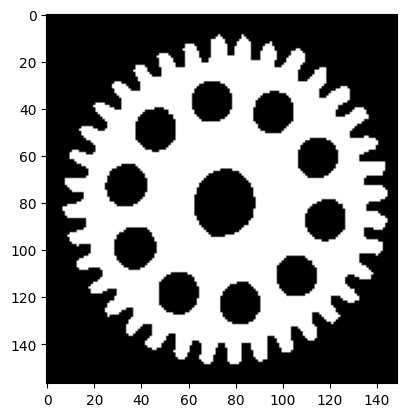

In [538]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(img)

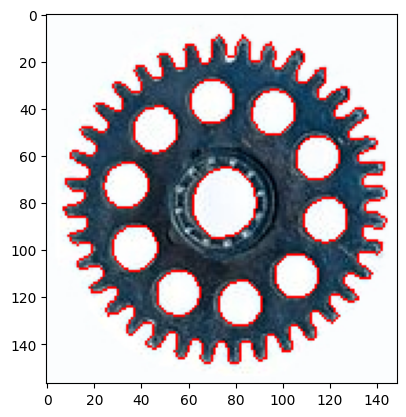

In [539]:
contours, hierarchy = cv2.findContours(img , cv2.RETR_TREE , cv2.CHAIN_APPROX_NONE )
plt.imshow(cv2.drawContours( img_o , contours , -1, (255,0,0) ))
plt.show()

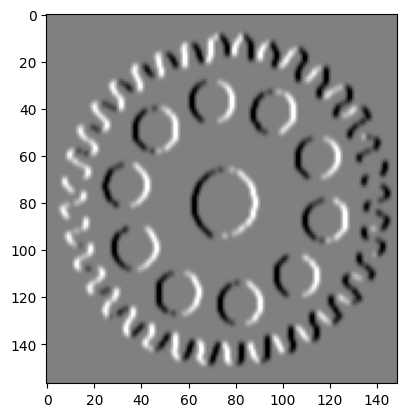

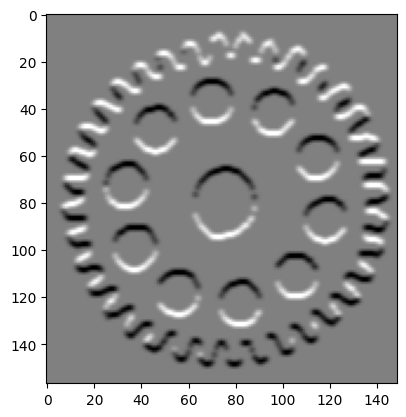

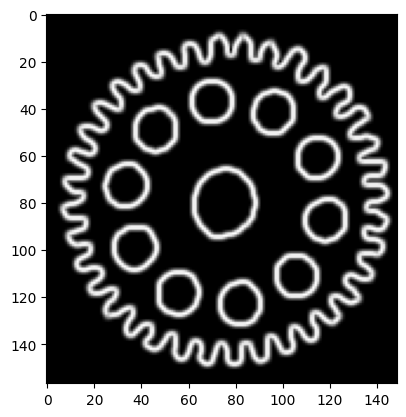

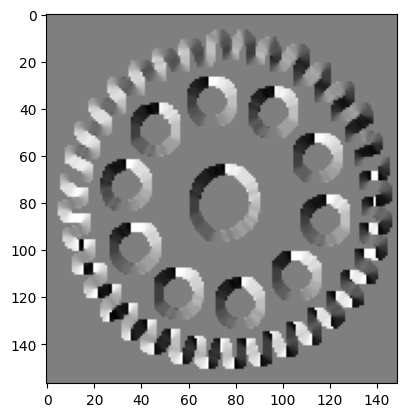

In [540]:
sobelx = cv2.Sobel( img , cv2 . CV_64F ,1 ,0 , ksize =5)
sobely = cv2 . Sobel ( img , cv2 . CV_64F ,0 ,1 , ksize =5)
sobelx = sobelx/np.amax(sobelx)
sobely = sobely/np.amax(sobely)
gradient = np.sqrt(sobelx**2 + sobely**2)
gradient = gradient/np.amax(gradient)
plt.imshow(sobelx.astype(np.float32))
plt.show()
plt.imshow(sobely.astype(np.float32))
plt.show()
plt.imshow(gradient.astype(np.float32))
plt.show()
# plt.show(sobelx)
alpha = np.arctan2(sobelx,sobely)
plt.imshow(alpha.astype(np.float32))
plt.show()

In [541]:
cv2.moments(img, 1)

{'m00': 10295.0,
 'm10': 788655.0,
 'm01': 815228.0,
 'm20': 72258895.0,
 'm11': 62280023.0,
 'm02': 76760774.0,
 'm30': 7342566939.0,
 'm21': 5698137489.0,
 'm12': 5853815371.0,
 'm03': 8011820150.0,
 'mu20': 11843478.873239443,
 'mu11': -171034.63380281627,
 'mu02': 12205485.803399712,
 'mu30': -7425921.395754814,
 'mu21': 2391999.4597878456,
 'mu12': 594994.6932110786,
 'mu03': 354406.6741256714,
 'nu20': 0.11174461093930546,
 'nu11': -0.0016137318110666494,
 'nu02': 0.1151601887438553,
 'nu30': -0.0006905330516554013,
 'nu21': 0.00022243094136030486,
 'nu12': 5.532828578776692e-05,
 'nu03': 3.2956115365151325e-05}

In [542]:
moments_img = cv2.moments(img, 1)
Rtable = [[] for _ in range (360) ]
xc, yc = (moments_img['m01']/moments_img['m00'], moments_img['m10']/moments_img['m00'] )
for i in range(contours[0].shape[0]):
    (x,y) = contours[0][i,0,:]
    alpha_t = -np.arctan2(xc-x,yc-y)+np.pi/2
    norm = np.sqrt((xc-x)**2+(yc-y)**2)
    theta = round(alpha[x,y]*360/(2*np.pi)+90)
    Rtable[theta].append((norm,alpha_t))
    # print(xc, x + norm*np.cos(alpha_t))
    # print(yc, y + norm*np.sin(alpha_t))


In [543]:
for r in Rtable:
    print(r)

[(64.20686904359104, 0.025009803836831823), (65.86024345632468, -0.14312911612991175), (64.87062577714877, -0.1453279702416197), (63.881331461635945, -0.14759494043699029), (63.049501681601626, -0.16561647506902077), (63.222056235879045, -0.181217943652205), (59.85930673304319, 4.112103484081081), (66.65866771749113, 3.8907161930705425)]
[]
[]
[]
[(67.58633736835749, -0.6405925158834136), (60.25158305914188, 3.922075283147741)]
[(60.697868262353836, 4.2912516084388805)]
[(63.189692081602495, 0.009584523290590452)]
[(66.85017013840606, -0.1409953738340095), (65.4456032613494, -0.3169007825774659)]
[]
[(67.80068876583051, 4.24061464655288)]
[]
[(71.2653629038434, -1.0381959169729447), (67.20622349370376, 4.05975245188667)]
[(63.26047383336794, 0.18450290884178688)]
[(65.2065611099706, 0.0246262964585231)]
[(63.188020365905615, -0.006241195010862288)]
[(60.96621754484358, 3.9105338411043324), (62.1898801036827, 3.727618159249993)]
[]
[]
[]
[(61.11348159110707, 4.276317775939111), (60.4298

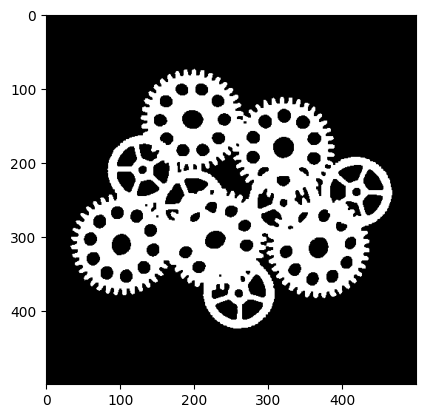

In [544]:
img_o_ = cv2.imread("trybiki2.jpg")
img_ = cv2.cvtColor(img_o_, cv2.COLOR_BGR2GRAY)
th, img_ = cv2.threshold(img_, 225, 255 , cv2.THRESH_BINARY)
img_ = cv2.bitwise_not(img_)
img_ = cv2.morphologyEx(img_, cv2.MORPH_CLOSE, np.ones((3,3)))
plt.gray()
plt.imshow(img_)

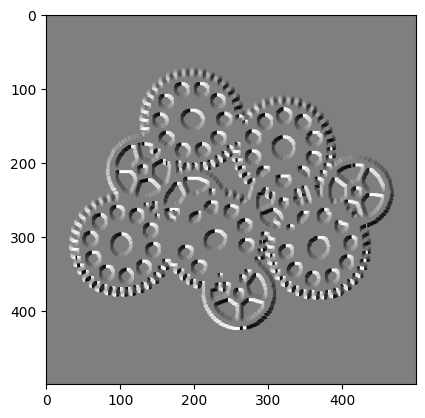

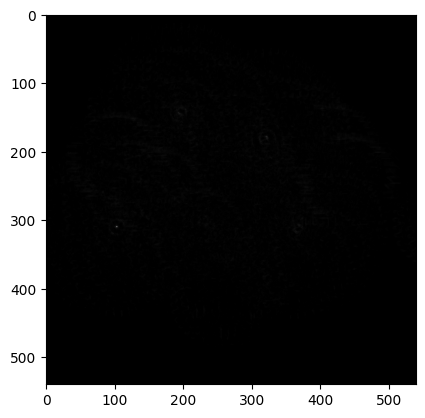

In [545]:
hough = np.zeros(np.array(img_.shape)+40)
sobelx = cv2.Sobel( img_ , cv2 . CV_64F ,1 ,0 , ksize =5)
sobely = cv2 . Sobel ( img_ , cv2 . CV_64F ,0 ,1 , ksize =5)
sobelx = sobelx/np.amax(sobelx)
sobely = sobely/np.amax(sobely)
gradient = np.sqrt(sobelx**2 + sobely**2)
gradient = gradient/np.amax(gradient)
alpha = np.arctan2(sobelx,sobely)
plt.imshow(alpha.astype(np.float32))
plt.show()
for i in range(gradient.shape[0]):
    for j in range(gradient.shape[1]):
        if(gradient[i,j]>0.5):
            fi = alpha[i,j]
            for pair in Rtable[round(fi*360/(2*np.pi)+90)]:
                (r, alp) = pair
                x1 = round(r* np . cos ( alp ) + i) #+ img_.shape[0]//2
                y1 = round(r* np . sin ( alp ) + j) #+ img_.shape[1]//2
                hough[x1,y1] += 1
plt.imshow(6*hough.astype(np.float32)/np.max(hough.astype(np.float32)))
plt.show()

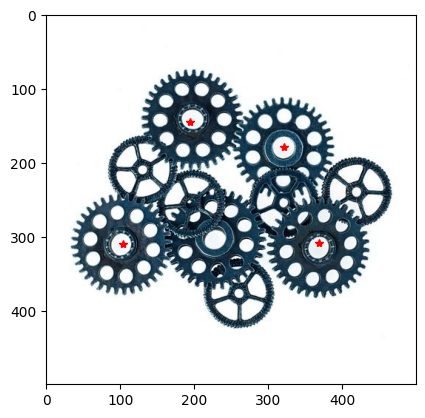

In [546]:
# [ m_x ], [ m_y ] = np . where ( hough . max () == hough )
temp = list(contours[0].shape)
temp.insert(0, 1)
# contour_temp = tuple((np.array(contours)-np.array([xc, yc])+np.array([m_x,m_y])))

plt.imshow(img_o_)
max_lst = []
for max in range(0, 4):
    temp = np.unravel_index(np.argmax(hough), hough.shape)
    max_lst.append(temp)
    hough[temp[0]-20:temp[0]+20, temp[1]-20:temp[1]+20] = 0
    plt . plot ([ temp[1] ], [ temp[0] ] ,'*', color ='r')


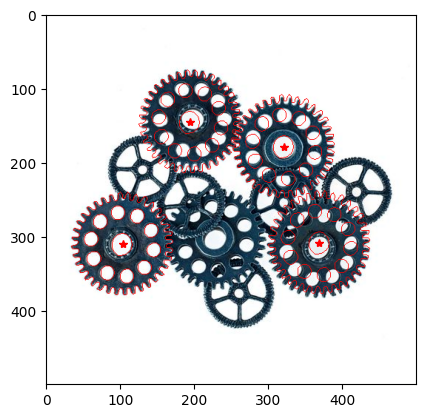

In [547]:
from copy import deepcopy
plt.imshow(img_o_)
for (x,y) in max_lst:
    cnt = deepcopy(np.array(contours,dtype=np.ndarray))
    for i in range(cnt.shape[0]):
        for j in range(cnt[i].shape[0]):
            for k in range(cnt[i].shape[1]):
                cnt[i][j,k,:] -= np.array([yc, xc],dtype=np.int32)-np.array([y,x],dtype=np.int32)

    cv2.drawContours( img_o_ , cnt , -1, (255,0,0) )
    plt . plot ([ y ], [ x ] ,'*', color ='r')
plt.imshow(img_o_)